## Ejercicio 1

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pylab as plt
%matplotlib inline
from urllib.request import urlopen

In [54]:
# mygraph = nx.read_gml("/home/tnoten/Documentos/Redes TP 1/TP1/Datos/yeast_LIT.txt")
urllit = "https://raw.githubusercontent.com/MarianoNicolini17/TP1/master/Datos/yeast_LIT.txt"
urlbin = "https://raw.githubusercontent.com/MarianoNicolini17/TP1/master/Datos/yeast_Y2H.txt"
urlprot = "https://raw.githubusercontent.com/MarianoNicolini17/TP1/master/Datos/yeast_AP-MS.txt"

fnlit = "Datos/yeast_LIT.txt"
fnbin = "Datos/yeast_Y2H.txt"
fnprot = "Datos/yeast_AP-MS.txt"
try:
    red_lit=[nx.read_edgelist(urlopen(urllit)),fnlit]
    red_bin=[nx.read_edgelist(urlopen(urlbin)),fnbin]
    red_prot=[nx.read_edgelist(urlopen(urlprot)),fnprot]
except: ### Por si no hay conexión a internet.
    red_lit=[nx.read_edgelist(open(fnlit)),fnlit]
    red_bin=[nx.read_edgelist(open(fnbin)),fnbin]
    red_prot=[nx.read_edgelist(open(fnprot)),fnprot]

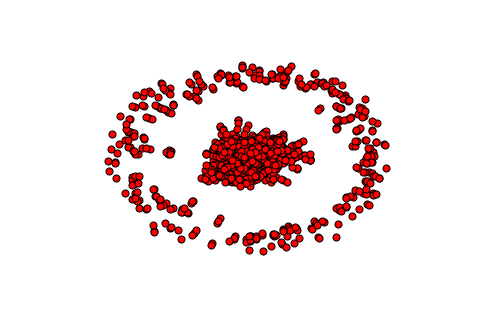

In [56]:
nx.draw(red_bin[0], node_size=50)

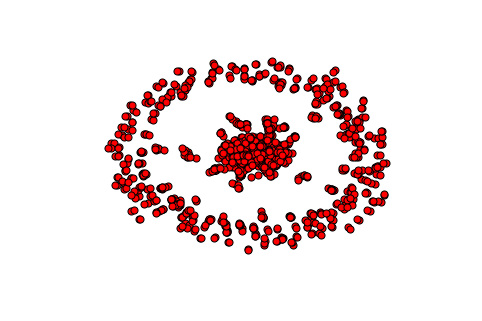

In [57]:
nx.draw(red_prot[0], node_size=50)

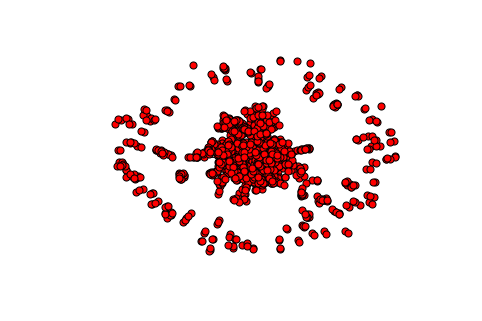

In [58]:
nx.draw(red_lit[0], node_size=50)

In [61]:
def propiedades(red):
        
    caract = {}
    caract['Nodos'] = red[0].number_of_nodes()
    caract['Enlaces'] = red[0].number_of_edges()
    caract['Dirigida'] = esDirigido(red[1])
    d = np.array([grado for nodo, grado in red[0].degree()])
    caract['Grado max'] = d.max()
    caract['Grado min'] = d.min()
    caract['Grado promedio'] = d.mean()
    caract['Densidad'] = caract['Enlaces'] / ((caract['Nodos']) * (caract['Nodos'] - 1) / 2)
    caract['Clustering medio'] = nx.average_clustering(red[0])
    caract['Transitividad'] = nx.transitivity(red[0])
    comps = list(nx.connected_component_subgraphs(red[0]))
    diams = np.array([])
    for comp in comps:
        diams = np.append(diams, nx.diameter(comp))
    caract['Diámetro'] = int(diams.max())
        
    return caract

In [62]:
redes = [red_prot, red_bin, red_lit]
props = []

for red in redes:
    props.append(propiedades(red))
sRed = ['Red Proteica','Red Binaria', 'Red Literatura']
pd.DataFrame(props, index=sRed)

,Clustering medio,Densidad,Dirigida,Diámetro,Enlaces,Grado max,Grado min,Grado promedio,Nodos,Transitividad
Red Proteica,0.554636,0.006899,False,15,9070,127,1,11.183724,1622,0.618590
Red Binaria,0.046194,0.001440,False,14,2930,91,1,2.903865,2018,0.023614
Red Literatura,0.292492,0.002481,False,19,2925,40,1,3.808594,1536,0.346193


In [20]:
from collections import defaultdict

def esDirigido(file):

    with open(file,"r") as f:
        vecinos = defaultdict(set)
        i = 0
        s = True
        for line in f:
            a = line.rstrip('\n').split('\t')
            v = a[0]
            w = a[1]
            vecinos[v].add(w)
            i += 1
            if v in vecinos[w] and  w!=v:
                return True
                # print(a)
                # print(i)
            elif v == w and s:
                print("Warning: No es un grafo simple")
                s = False
                # print(a)
                # print(i)
            
        return False

In [21]:
esDirigido("Datos/yeast_LIT.txt") #Prueba de la función

False